In [20]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [21]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df1 = pd.read_excel(data_path, sheet_name=1)



## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [22]:
# Make a new column 'Health_Status'
df = df1.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()


,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,Control,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,Control,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,Control,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,Control,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


In [23]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.tail()

Original class distribution:
Sana
0    209
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    209
0    209
Name: count, dtype: int64

Original shape: (239, 2151), Balanced shape: (418, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_24436\615229929.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
413,1,0.080290,0.077261,0.077487,0.074385,0.072847,0.071537,0.065164,0.063301,0.063654,...,0.034528,0.034321,0.034066,0.033883,0.033711,0.033504,0.033345,0.033148,0.032839,0.032663
414,1,0.081406,0.077274,0.081993,0.077986,0.073320,0.070453,0.066987,0.066716,0.067418,...,0.033634,0.033468,0.033198,0.033026,0.032885,0.032743,0.032651,0.032544,0.032396,0.032339
415,1,0.071206,0.067798,0.074649,0.069848,0.064469,0.062234,0.060180,0.059111,0.059014,...,0.029659,0.029516,0.029461,0.029332,0.029144,0.029002,0.028835,0.028764,0.028772,0.028722
416,1,0.080385,0.079173,0.084212,0.079746,0.074177,0.070678,0.067657,0.067404,0.068233,...,0.037873,0.037740,0.037619,0.037477,0.037375,0.037228,0.037007,0.036848,0.036701,0.036624
417,1,0.076560,0.072964,0.077773,0.073316,0.069515,0.067558,0.062048,0.062203,0.064721,...,0.033479,0.033316,0.033260,0.033110,0.032969,0.032828,0.032615,0.032477,0.032428,0.032320


In [24]:
# Add a column to distinguish between data before and after balancing
# Mark original data
n_original = len(df)
n_synthetic = len(df_balanced) - n_original

# Create status array: first n_original are 'Original', rest are 'Balanced'
data_status = ['Original'] * n_original + ['Balanced'] * n_synthetic
df_balanced.insert(0, 'Data_Status', data_status)
df_balanced.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_24436\56007382.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Data_Status', data_status)


,Data_Status,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Original,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,Original,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,Original,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,Original,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,Original,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


In [25]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana', 'Data_Status'])

X = df_X.values  
y = df_balanced['Sana'].values
data_status = df_balanced['Data_Status'].values  # Keep track of data origin

#split the data into training and testing sets
X_train, X_test, y_train, y_test, status_train, status_test = train_test_split(
    X, y, data_status, test_size=0.3, random_state=42, stratify=y
)

# Print distribution
print(f"Test set distribution:")
print(f"Original samples: {sum(status_test == 'Original')}")
print(f"Balanced samples: {sum(status_test == 'Balanced')}")

Test set distribution:
Original samples: 69
Balanced samples: 57


### Logistic Regression

In [26]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Get PCA component and check dimensions
pca_component = best_model.named_steps['PCA']
print(f"Number of PCA components used: {pca_component.n_components_}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Shape of transformed data: ({X_train.shape[0]}, {pca_component.n_components_})")
print(f"Explained variance ratio: {pca_component.explained_variance_ratio_}")
print(f"Total explained variance: {pca_component.explained_variance_ratio_.sum():.4f}")

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Number of PCA components used: 2
Training samples: 292
Shape of transformed data: (292, 2)
Explained variance ratio: [0.67241153 0.18424772]
Total explained variance: 0.8567
Best Model Accuracy: 0.9285714285714286
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.91      0.95      0.93        63

    accuracy                           0.93       126
   macro avg       0.93      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126



In [27]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 10, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


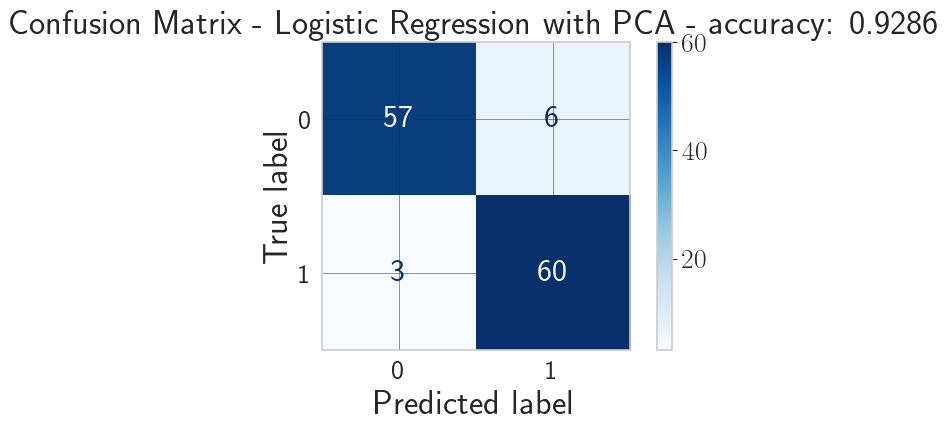

In [28]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()

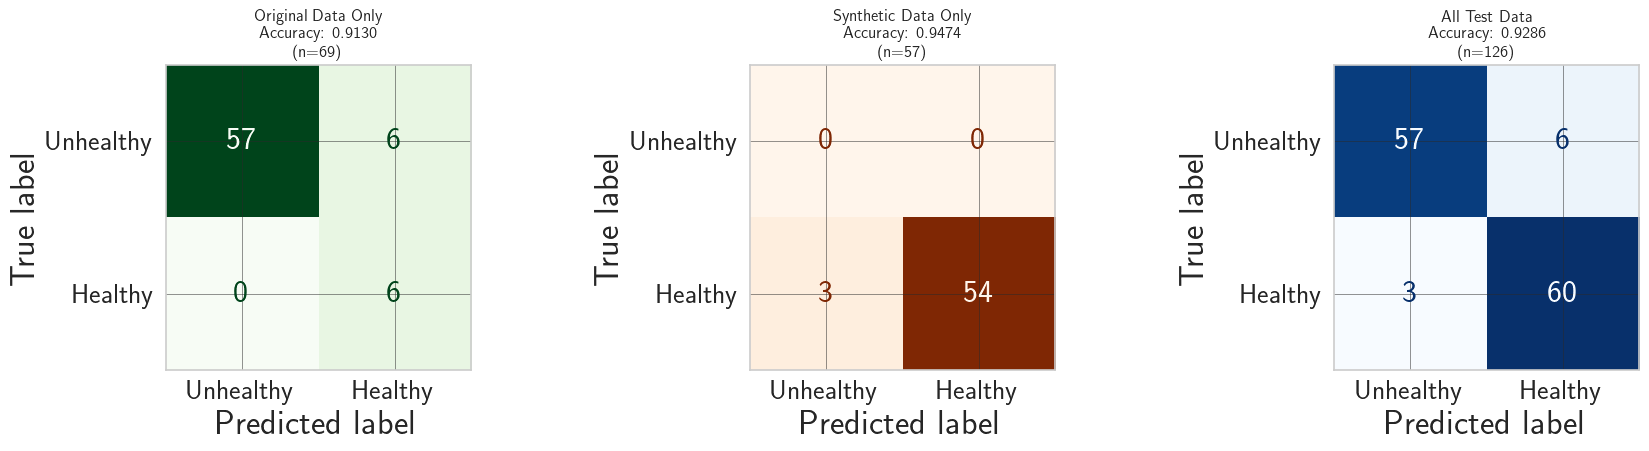

In [29]:
# Detailed analysis of predictions by data origin
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Separate predictions by data origin
original_mask = status_test == 'Original'
balanced_mask = status_test == 'Balanced'

# Calculate metrics for original data
y_test_original = y_test[original_mask]
y_pred_original = y_pred_best[original_mask]

# Calculate metrics for balanced data
y_test_balanced = y_test[balanced_mask]
y_pred_balanced = y_pred_best[balanced_mask]

# Create confusion matrices
cm_original = confusion_matrix(y_test_original, y_pred_original)
cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
cm_total = confusion_matrix(y_test, y_pred_best)

# Calculate accuracies
acc_original = accuracy_score(y_test_original, y_pred_original)
acc_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
acc_total = accuracy_score(y_test, y_pred_best)

# Define class labels (0=Unhealthy, 1=Healthy)
class_labels = ['Unhealthy', 'Healthy']

# Create figure with subplots
fig = plt.figure(figsize=(18, 5))
gs = GridSpec(1, 3, figure=fig)

# Plot 1: Original data confusion matrix
ax1 = fig.add_subplot(gs[0, 0])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_original, display_labels=class_labels)
disp1.plot(cmap='Greens', ax=ax1, colorbar=False)
ax1.set_title(f'Original Data Only\nAccuracy: {acc_original:.4f}\n(n={sum(original_mask)})', fontsize=12)

# Plot 2: Balanced (synthetic) data confusion matrix
ax2 = fig.add_subplot(gs[0, 1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=class_labels)
disp2.plot(cmap='Oranges', ax=ax2, colorbar=False)
ax2.set_title(f'Synthetic Data Only\nAccuracy: {acc_balanced:.4f}\n(n={sum(balanced_mask)})', fontsize=12)

# Plot 3: Total confusion matrix
ax3 = fig.add_subplot(gs[0, 2])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_total, display_labels=class_labels)
disp3.plot(cmap='Blues', ax=ax3, colorbar=False)
ax3.set_title(f'All Test Data\nAccuracy: {acc_total:.4f}\n(n={len(y_test)})', fontsize=12)

plt.tight_layout()
plt.show()


## Algorithmic Balancing

In [30]:
# Make a new column 'Health_Status' based on 'Tratamiento'
df_HvsUnH = df1.copy()

df_HvsUnH['Health_Status'] = df_HvsUnH['Tratamiento'].apply(lambda x: 'Healthy' if x == 'Control' else 'Unhealthy')

df_HvsUnH.head()

,Tratamiento,350,351,352,353,354,355,356,357,358,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,Health_Status
0,Control,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,0.063808,...,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142,Healthy
1,Control,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,0.058499,...,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492,Healthy
2,Control,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,0.062749,...,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511,Healthy
3,Control,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,0.053525,...,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915,Healthy
4,Control,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,0.059372,...,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371,Healthy


In [31]:
# data treatment

# Data preparation for model production
df_X = df_HvsUnH.drop(columns=['Health_Status'])

X = df_X.iloc[:, 1:].values  

y = df_HvsUnH['Health_Status'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options - only 'saga' supports class_weight with l1
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__class_weight': ['balanced']
    },
    # L2 regularization options - all these solvers support class_weight
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs', 'saga'],
        'model__class_weight': ['balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': ['balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.875
Best Model Classification Report:
               precision    recall  f1-score   support

     Healthy       0.50      0.89      0.64         9
   Unhealthy       0.98      0.87      0.92        63

    accuracy                           0.88        72
   macro avg       0.74      0.88      0.78        72
weighted avg       0.92      0.88      0.89        72



In [33]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'saga'}


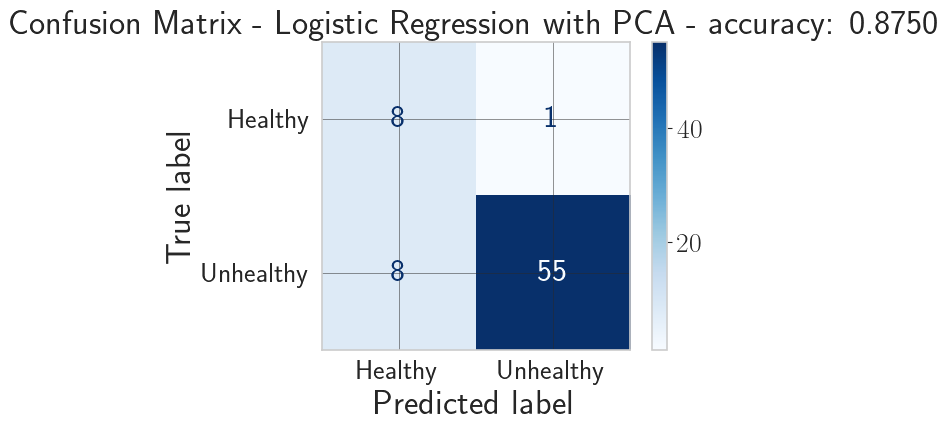

In [34]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()